In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
from subprocess import check_output

In [63]:
data = pd.read_csv('sentimentdataset.csv')

In [64]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [65]:
data = data[['Text','Sentiment']]

In [66]:
data

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


In [67]:
data.shape

(732, 2)

In [68]:
# split the data into training, testing datasets
train, test = train_test_split(data,test_size = 0.1)

In [69]:
train

,Text,Sentiment
21,Exploring the world of virtual reality. ...,Positive
558,The weightlifter's failed attempt at a persona...,Challenge
360,Contentment in the midst of a family gathering...,Contentment
576,Engulfed in the aroma of freshly brewed coffee...,Creative Inspiration
256,"Bathed in the glow of inspiration, a creative...",Inspired
...,...,...
684,Encountered some mean-spirited comments online...,Hate
673,Practicing a stand-up comedy routine for the u...,Joy
365,Optimism for a bright future amidst challengin...,Optimism
110,The victory of our team brought euphoria to t...,Euphoria


In [70]:
train = train[train.Sentiment != ' Neutral']

In [71]:
train

,Text,Sentiment
21,Exploring the world of virtual reality. ...,Positive
558,The weightlifter's failed attempt at a persona...,Challenge
360,Contentment in the midst of a family gathering...,Contentment
576,Engulfed in the aroma of freshly brewed coffee...,Creative Inspiration
256,"Bathed in the glow of inspiration, a creative...",Inspired
...,...,...
684,Encountered some mean-spirited comments online...,Hate
673,Practicing a stand-up comedy routine for the u...,Joy
365,Optimism for a bright future amidst challengin...,Optimism
110,The victory of our team brought euphoria to t...,Euphoria


In [72]:
train['Sentiment'].unique()

array([' Positive  ', ' Challenge ', ' Contentment   ',
       ' Creative Inspiration ', ' Inspired ', ' Acceptance      ',
       ' Enchantment   ', ' Radiance    ', ' Confusion    ',
       ' Contentment ', ' Coziness     ', ' Bitterness ', ' Grateful ',
       ' Awe          ', ' Creativity   ', ' Joy ', ' Neutral ',
       ' Ambivalence     ', ' Colorful ', ' Sad ', ' Fear         ',
       ' Grief           ', ' Tranquility ', ' Happy ', ' Jealous ',
       ' Free-spirited ', ' Fearful ', ' Hopeful ', ' Helplessness    ',
       ' Heartbreak ', ' Bitter       ', ' Ruins      ', ' Adventure ',
       ' Confusion       ', ' Obstacle ', ' Immersion ', ' Enthusiasm ',
       ' Intimidation    ', ' Indifference ', ' Emotion ',
       ' Pride        ', ' Hate ', ' Harmony       ', ' Numbness ',
       ' Determination   ', ' Gratitude     ', ' Grief      ',
       ' Amusement    ', ' Numbness        ', ' Nostalgia ',
       ' Negative  ', ' Motivation    ', ' Indifference    ',
       ' 

In [73]:
train_positive = train[ train['Sentiment'] == ' Positive ']
train_positive = train_positive['Text']
train_negative = train[ train['Sentiment'] == ' Negative  ']
train_negative = train_negative['Text']

In [74]:
train_positive

,Text
647,Convinced the teacher to have class outdoors. ...


Positive words


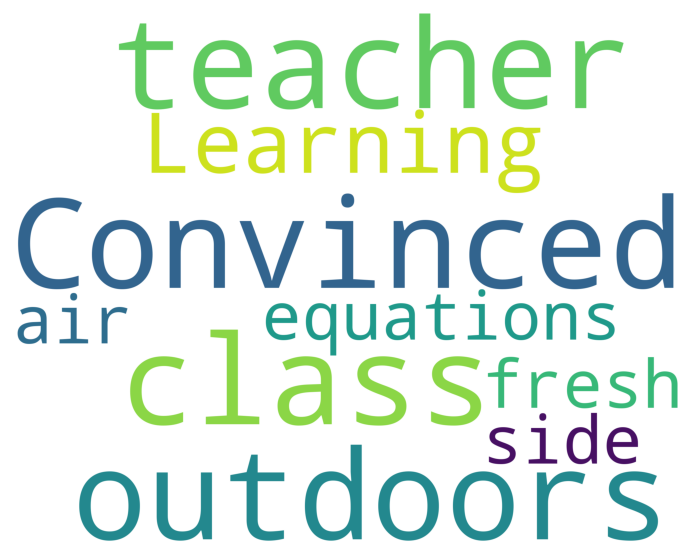

Negative words


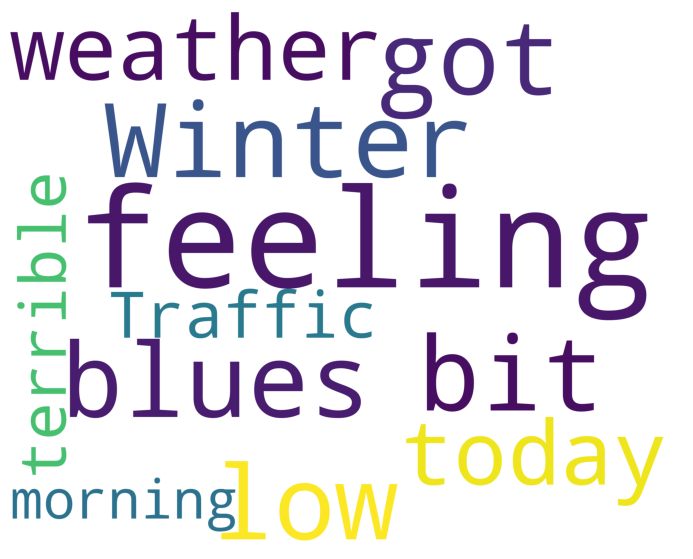

In [76]:
def wordcloud_draw(data,color = 'white'):
  words = ' '.join(data)
  cleaned_word = " ".join([word for word in words.split() if 'http'not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
  wordcloud = WordCloud(stopwords = STOPWORDS,background_color = color,width = 2500,height = 2000).generate(cleaned_word)
  plt.figure(1,figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
print('Positive words')
wordcloud_draw(train_positive,'white')
print('Negative words')
wordcloud_draw(train_negative)